


Sample Smoking dataset head(5) :- 

    ID gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  eyesight(right)  hearing(left)  hearing(right)  systolic  relaxation  fasting blood sugar  Cholesterol  triglyceride   HDL    LDL  hemoglobin  Urine protein  serum creatinine   AST   ALT   Gtp oral  dental caries tartar  smoking
0   0      F   40         155          60       81.3             1.2              1.0            1.0             1.0     114.0        73.0                 94.0        215.0          82.0  73.0  126.0        12.9            1.0               0.7  18.0  19.0  27.0    Y              0      Y        0
1   1      F   40         160          60       81.0             0.8              0.6            1.0             1.0     119.0        70.0                130.0        192.0         115.0  42.0  127.0        12.7            1.0               0.6  22.0  19.0  18.0    Y              0      Y        0
2   2      M   55         170          60       80.0           

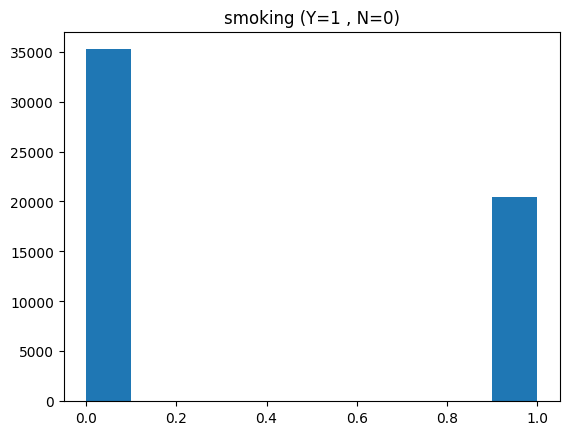




After id feature is set as row index: 
       gender  age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  eyesight(right)  hearing(left)  hearing(right)  systolic  relaxation  fasting blood sugar  Cholesterol  triglyceride   HDL    LDL  hemoglobin  Urine protein  serum creatinine   AST   ALT   Gtp oral  dental caries tartar  smoking
ID                                                                                                                                                                                                                                                                                                        
0          F   40         155          60       81.3             1.2              1.0            1.0             1.0     114.0        73.0                 94.0        215.0          82.0  73.0  126.0        12.9            1.0               0.7  18.0  19.0  27.0    Y              0      Y        0
1          F   40         160          60       81.0        

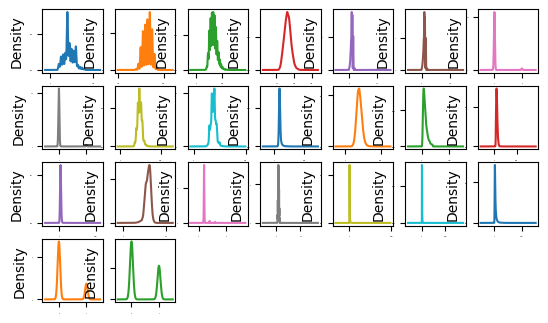

ValueError: could not convert string to float: 'F'

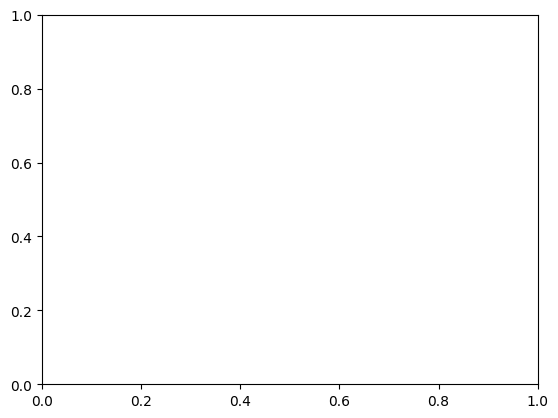

In [5]:
#MLProject: Brain Tumor Cancer Prediction
#-----------------------------------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline
import time

import warnings
warnings.filterwarnings(action="ignore")
pd.set_option('display.width', 1000)
pd.set_option('display.max_column', None)


#Exploratory data analysis(EDA)
#Load the dataset and do some quick exploratory data analysis.

data = pd.read_csv('smoking.csv', index_col=False)
print("\n\n\nSample Smoking dataset head(5) :- \n\n", data.head(5) )

print("\n\n\nShape of the Smoking dataset  data.shape = ", end="")
print( data.shape)

print("\n\n\nSmoking data decription : \n")
print( data.describe() )

#Data visualisation and pre-processing
print( "\n\n\ndata.smoking.unique() : " , data.smoking.unique() )


plt.hist(data['smoking'])
plt.title('smoking (Y=1 , N=0)')
plt.show()

data = data.set_index('ID')
print("\n\n\nAfter id feature is set as row index: \n", data)

#Encoding Gender And Converting tartar and oral
data['oral'] = data['oral'].map(lambda x: x.replace("Y","1").replace("N","0"))
data['oral'] = data['oral'].astype(int)

data['tartar'] = data['tartar'].map(lambda x: x.replace("Y","1").replace("N","0"))
data['tartar'] = data['tartar'].astype(int) 

data["gender"].encode()

print(data.head(5))

# Grouping Based upon Smoking
print("\n\n\ndata.groupby('smoking').size()\n")
print(data.groupby('smoking').size())


#Next, we visualise the data using density plots to get a sense of the data distribution.
# From the outputs below, you can see the data shows a general gaussian distribution.
data.plot(kind='density', subplots=True, layout=(5,7), sharex=False, legend=False, fontsize=1)
plt.show()

from matplotlib import cm as cm
fig = plt.figure()
ax1 = fig.add_subplot(111)
cax = ax1.imshow(data.corr())
ax1.grid(True)
plt.title('Smoking Attribute Correlation')
# Add colorbar, make sure to specify tick locations to match desired ticklabels
fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
plt.show()

#Finally, we'll split the data into predictor variables and target variable,
# following by breaking them into train and test sets. We will use 33% of the data as test set.

Y = data['smoking'].values
X = data.drop('smoking', axis=1).values

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state=21)
#Baseline algorithm checking
#From the dataset, we will analysis and build a model to predict if a given set of
# symptoms lead to a Smoker.
# This is a binary classification problem, and a few algorithms are appropriate for use.
# Since we do not know which one will perform the best at the point,
# we will do a quick test on the few algorithms to get an early indication of how each of them perform.
# We will use K-Fold cross validation for each testing.

#The following  algorithms will be used,

#1) Classification and Regression Trees (CART),
#2) Support Vector Machines (SVM),
#3) Gaussian Naive Bayes (NB)
#4) k-Nearest Neighbors (KNN).

models_list = []
models_list.append(('CART', DecisionTreeClassifier()))
models_list.append(('SVM', SVC()))
models_list.append(('NB', GaussianNB()))
models_list.append(('KNN', KNeighborsClassifier()))

num_folds = 10

results = []
names = []

for name, model in models_list:
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=123)
    start_Time = time.time()
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    end_Time = time.time()
    results.append(cv_results)
    names.append(name)
    print( "%-7s: %10f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end_Time-start_Time))

#Performance Comparision
#------------------------------
fig = plt.figure()
fig.suptitle('Performance Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


#From the initial run, it looks like GaussianNB, KNN and CART performed the best
# given the dataset (all above 92% mean accuracy).
# Support Vector Machine has a surprisingly bad performance here.
# However, if we standardise the input dataset, it's performance should improve.

#Evaluation of algorithm on Standardised Data
#The performance of the machine learning algorithm could be improved if a
# standardised dataset is being used.

# The improvement is likely for all the models.

# I will use pipelines that standardize the data and build the model for each
#  fold in the cross-validation test harness.

# That way we can get a fair estimation of how each model with standardized data might perform on unseen data.

# Standardize the dataset
pipelines = []

pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeClassifier())])))
pipelines.append(('ScaledSVM', Pipeline([('Scaler', StandardScaler()),('SVM', SVC( ))])))
pipelines.append(('ScaledNB', Pipeline([('Scaler', StandardScaler()),('NB', GaussianNB())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsClassifier())])))

results = []
names = []

print("\n\n\nAccuracies of algorithm after scaled dataset\n")

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=123)
    for name, model in pipelines:
        start = time.time()
        cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
        end = time.time()
        results.append(cv_results)
        names.append(name)
        print( "%s: %f (%f) (run time: %f)" % (name, cv_results.mean(), cv_results.std(), end-start))


#ScaledCART: 0.920966 (0.038259) (run time: 0.098808)
#ScaledSVM: 0.964879 (0.038621) (run time: 0.073377)
#ScaledNB: 0.931932 (0.038625) (run time: 0.027154)
#ScaledKNN: 0.958357 (0.038595) (run time: 0.040088)

#Notice the drastic improvement of SVM after using scaled data.


#Performance Comparison after Scaled Data
#----------------------------------------

fig = plt.figure()
fig.suptitle('Performance Comparison after Scaled Data')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()